In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

# 엑셀 파일을 불러옵니다
file_path = '23_seoul_rainfall_traffic.xlsx'
data = pd.read_excel(file_path)

# 데이터프레임의 구조를 이해하기 위해 처음 몇 줄을 표시합니다
data.head()


,날짜,교통량,기온
0,2023-01-02,7487319,-4.5
1,2023-01-03,7861867,-5.0
2,2023-01-04,7935855,-1.8
3,2023-01-05,8078752,-1.6
4,2023-01-06,8158519,0.6


In [2]:
# 회귀 분석을 위한 데이터 준비
X = data['기온']  # 예측 변수
y = data['교통량']  # 종속 변수

# 예측 변수에 상수를 추가
X = sm.add_constant(X)

# 선형 회귀 수행
# OLS(Ordinary Least Squares)는 선형 회귀를 위한 방법입니다.
# 이 방법은 관측된 값과 선형 모델에 의해 예측된 값 사이의 제곱 차이(잔차)의 합을 최소화합니다.
# 간단하고 널리 사용되는 회귀 분석 방법입니다.
model = sm.OLS(y, X).fit()

# 회귀의 요약
regression_summary = model.summary()
regression_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    교통량   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     105.4
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           8.49e-21
Time:                        09:07:34   Log-Likelihood:                -3511.9
No. Observations:                 247   AIC:                             7028.
Df Residuals:                     245   BIC:                             7035.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        8.37e+06    3.9e+04    214.637      0.000    8.29e+06    8.45e+06
기온          2.263e+04   2203.967     10.266      0.000    1.83e+04     2.7e+04
==============================================================================
Omnibus:                       36.584   Durbin-Watson:                   1.179
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.584
Skew:                          -0.756   Prob(JB):                     1.73e-16
Kurtosis:                       5.183   Cond. No.                         29.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

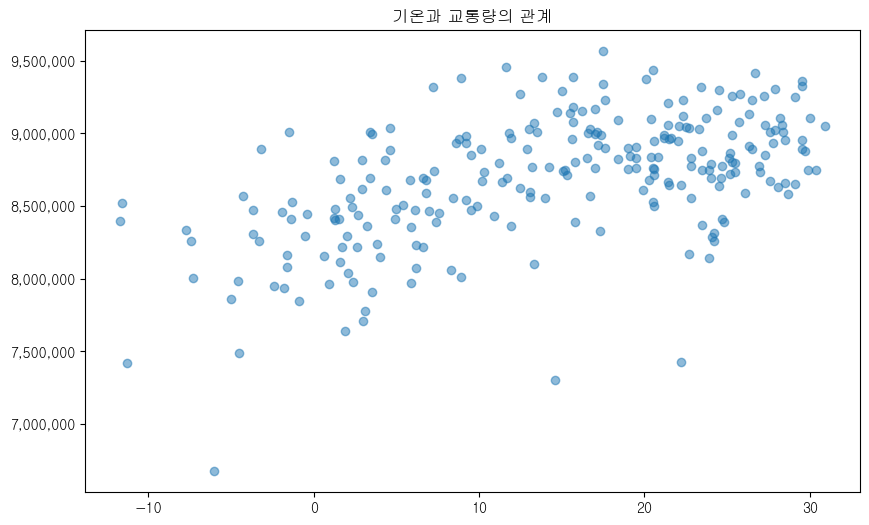

In [8]:
import matplotlib as mpl
import matplotlib.font_manager as fm

# 폰트 경로 설정 (폰트깨짐 방지)
font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
mpl.rc('font', family=font)

# 데이터 산점도 그리기
plt.figure(figsize=(10, 6))
plt.scatter(data['기온'], data['교통량'], alpha=0.5)


# y축을 천 단위 구분자가 표시되도록 조정
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.title('기온과 교통량의 관계')

# 그래프 표시
plt.show()




In [11]:
X = data['기온']  # 예측 변수
X

0      -4.5
1      -5.0
2      -1.8
3      -1.6
4       0.6
       ... 
242   -11.6
243     1.9
244     1.5
245     1.2
246     1.3
Name: 기온, Length: 247, dtype: float64

In [12]:
X = sm.add_constant(data['기온'])  #변수에 상수 추가
X

,const,기온
0,1.0,-4.5
1,1.0,-5.0
2,1.0,-1.8
3,1.0,-1.6
4,1.0,0.6
...,...,...
242,1.0,-11.6
243,1.0,1.9
244,1.0,1.5
245,1.0,1.2


In [13]:
### 회귀선 추가하기



# 회귀선
X = sm.add_constant(data['기온'])  #변수에 상수 추가
model = sm.OLS(data['교통량'], X).fit()  # 선형 회귀 수행
model.params

const    8.369874e+06
기온       2.262599e+04
dtype: float64

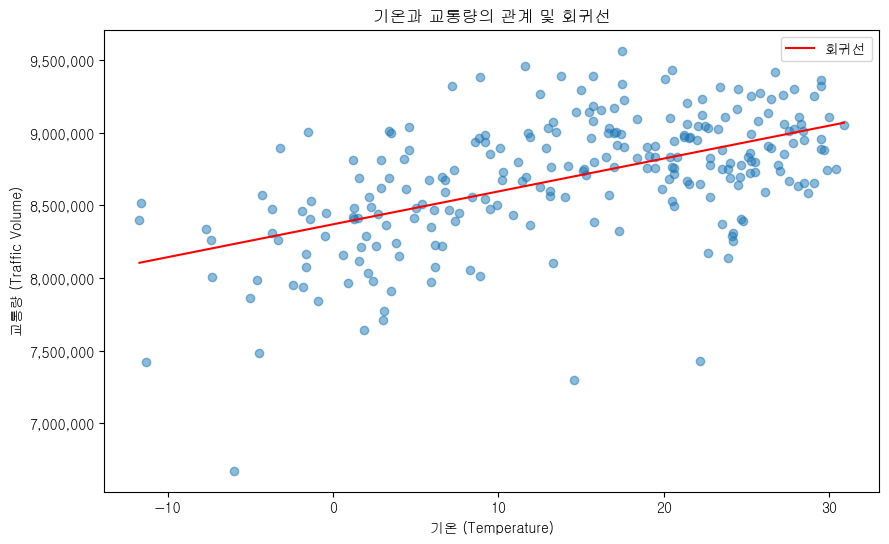

In [17]:
# 데이터 산점도 그리기
plt.figure(figsize=(10, 6))

b, a = model.params
x_values = np.array([data['기온'].min(), data['기온'].max()])
y_values = a * x_values + b
plt.plot(x_values, y_values, 'r', label='회귀선')

# 레이블 및 제목
plt.xlabel('기온 (Temperature)')
plt.ylabel('교통량 (Traffic Volume)')
plt.title('기온과 교통량의 관계 및 회귀선')
plt.legend()


plt.scatter(data['기온'], data['교통량'], alpha=0.5)


# y축을 천 단위 구분자가 표시되도록 조정
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()

In [18]:
# 회귀선의 기울기
slope = model.params[1]
print("회귀선의 기울기: ", slope)

회귀선의 기울기:  22625.99234011451
